# Mushroom Classification Project

## Predicting Mushroom Edibility using Machine Learning

This notebook covers the complete ML pipeline for classifying mushrooms as edible or poisonous based on their characteristics.

## 1. Data Loading & Overview

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import warnings
import mplcyberpunk
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use("cyberpunk")
plt.style.use("dark_background")
plt.rcParams["axes.grid"] = False
plt.rcParams['figure.figsize'] = (12, 6)

In [3]:
# Load the dataset
df = pd.read_csv('data/mushroom.csv', sep=';')
df

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,s,y,f,f,f,f,3.93,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


In [4]:
# Display basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [5]:
# Display column names and data types
df.dtypes

class                    object
cap-diameter            float64
cap-shape                object
cap-surface              object
cap-color                object
does-bruise-or-bleed     object
gill-attachment          object
gill-spacing             object
gill-color               object
stem-height             float64
stem-width              float64
stem-root                object
stem-surface             object
stem-color               object
veil-type                object
veil-color               object
has-ring                 object
ring-type                object
spore-print-color        object
habitat                  object
season                   object
dtype: object

In [6]:
# Display statistical summary
df.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


## 2. Exploratory Data Analysis (EDA)

### 2.1 Data Quality Assessment

In [7]:
# Check for missing values
df.isnull().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

In [8]:
# Check for missing values percentages
missing_data = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
pd.DataFrame({'Missing Count': missing_data, 'Percentage': missing_percent})[missing_data > 0].sort_values(by='Percentage', ascending=False)

,Missing Count,Percentage
veil-type,57892,94.797688
spore-print-color,54715,89.595376
veil-color,53656,87.861272
stem-root,51538,84.393064
stem-surface,38124,62.427746
gill-spacing,25063,41.040462
cap-surface,14120,23.121387
gill-attachment,9884,16.184971
ring-type,2471,4.046243


In [9]:
# Check unique values per column
unique_summary = pd.DataFrame({
    'Column': df.columns,
    'Unique Values': [df[col].nunique() for col in df.columns],
    'Data Type': df.dtypes.values
})
unique_summary

,Column,Unique Values,Data Type
0,class,2,object
1,cap-diameter,2571,float64
2,cap-shape,7,object
3,cap-surface,11,object
4,cap-color,12,object
5,does-bruise-or-bleed,2,object
6,gill-attachment,7,object
7,gill-spacing,3,object
8,gill-color,12,object
9,stem-height,2226,float64


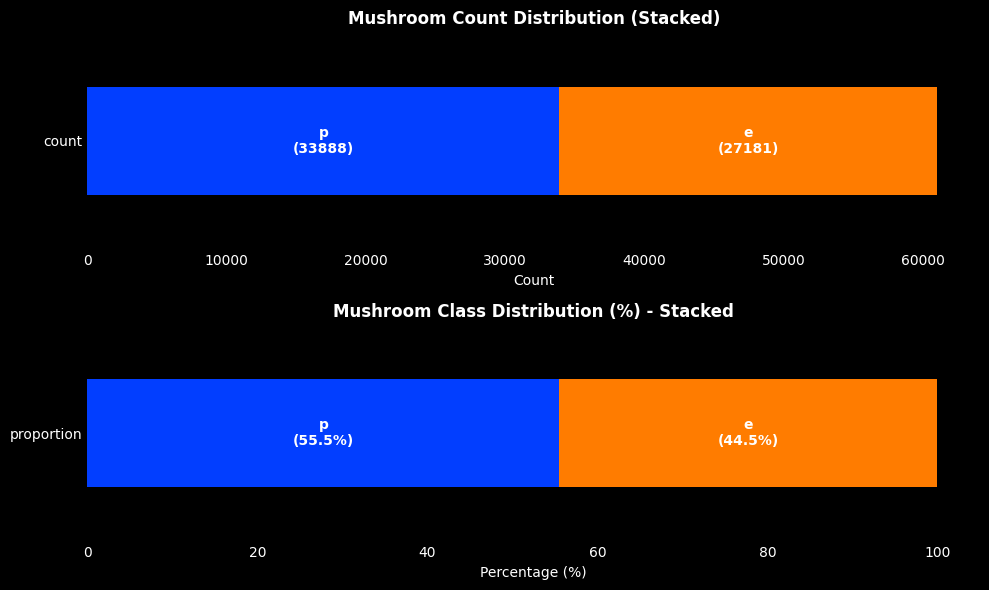

In [10]:
# Analyze the target variable with stacked bars
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,6))

# Get class data
class_counts = df['class'].value_counts()
proportions = df['class'].value_counts(normalize=True) * 100

# Top plot: Stacked horizontal bar with counts
class_data = pd.DataFrame(class_counts).T
class_data.plot(kind='barh', stacked=True, ax=ax1, color=sns.color_palette('bright', 2), legend=False, width=0.5)
ax1.set_title('Mushroom Count Distribution (Stacked)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Count')

# Add value labels on stacked bars
cumsum = 0
for i, class_name in enumerate(class_counts.index):
    value = class_counts[class_name]
    x_pos = cumsum + value / 2
    ax1.text(x_pos, 0, f'{class_name}\n({value})', ha='center', va='center', fontweight='bold', color='white', fontsize=10)
    cumsum += value

# Bottom plot: Stacked horizontal bar with percentages
class_prop = pd.DataFrame(proportions).T
class_prop.plot(kind='barh', stacked=True, ax=ax2, color=sns.color_palette('bright', 2), legend=False, width=0.5)
ax2.set_title('Mushroom Class Distribution (%) - Stacked', fontsize=12, fontweight='bold')
ax2.set_xlabel('Percentage (%)')

# Add value labels on stacked bars
cumsum = 0
for i, class_name in enumerate(proportions.index):
    value = proportions[class_name]
    x_pos = cumsum + value / 2
    ax2.text(x_pos, 0, f'{class_name}\n({value:.1f}%)', ha='center', va='center', fontweight='bold', color='white', fontsize=10)
    cumsum += value

plt.tight_layout()
plt.show()

In [11]:
class_stats = pd.DataFrame({
'Count': df['class'].value_counts(),
'Percentage': df['class'].value_counts(normalize=True) * 100
})
class_stats

,Count,Percentage
class,,
p,33888,55.491329
e,27181,44.508671


In [12]:
# Check for duplicates
duplicates_info = pd.DataFrame({
    'Metric': ['Total rows', 'Duplicate rows', 'Unique rows'],
    'Count': [len(df), df.duplicated().sum(), len(df) - df.duplicated().sum()]
})
duplicates_info

,Metric,Count
0,Total rows,61069
1,Duplicate rows,146
2,Unique rows,60923


In [13]:
# Analyze data types
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

type_summary = pd.DataFrame({
    'Type': ['Numerical', 'Categorical'],
    'Count': [len(numerical_cols), len(categorical_cols)],
    'Columns': [', '.join(numerical_cols) if numerical_cols else 'None', 
                ', '.join(categorical_cols[:3]) + ('...' if len(categorical_cols) > 3 else '')]
})
type_summary

,Type,Count,Columns
0,Numerical,3,"cap-diameter, stem-height, stem-width"
1,Categorical,18,"class, cap-shape, cap-surface..."


In [14]:
# Categorical columns summary
cat_summary = pd.DataFrame({
    'Column': categorical_cols,
    'Unique Values': [df[col].nunique() for col in categorical_cols]
}).sort_values('Unique Values', ascending=False)
cat_summary

,Column,Unique Values
10,stem-color,13
3,cap-color,12
7,gill-color,12
2,cap-surface,11
14,ring-type,8
16,habitat,8
9,stem-surface,8
1,cap-shape,7
15,spore-print-color,7
5,gill-attachment,7


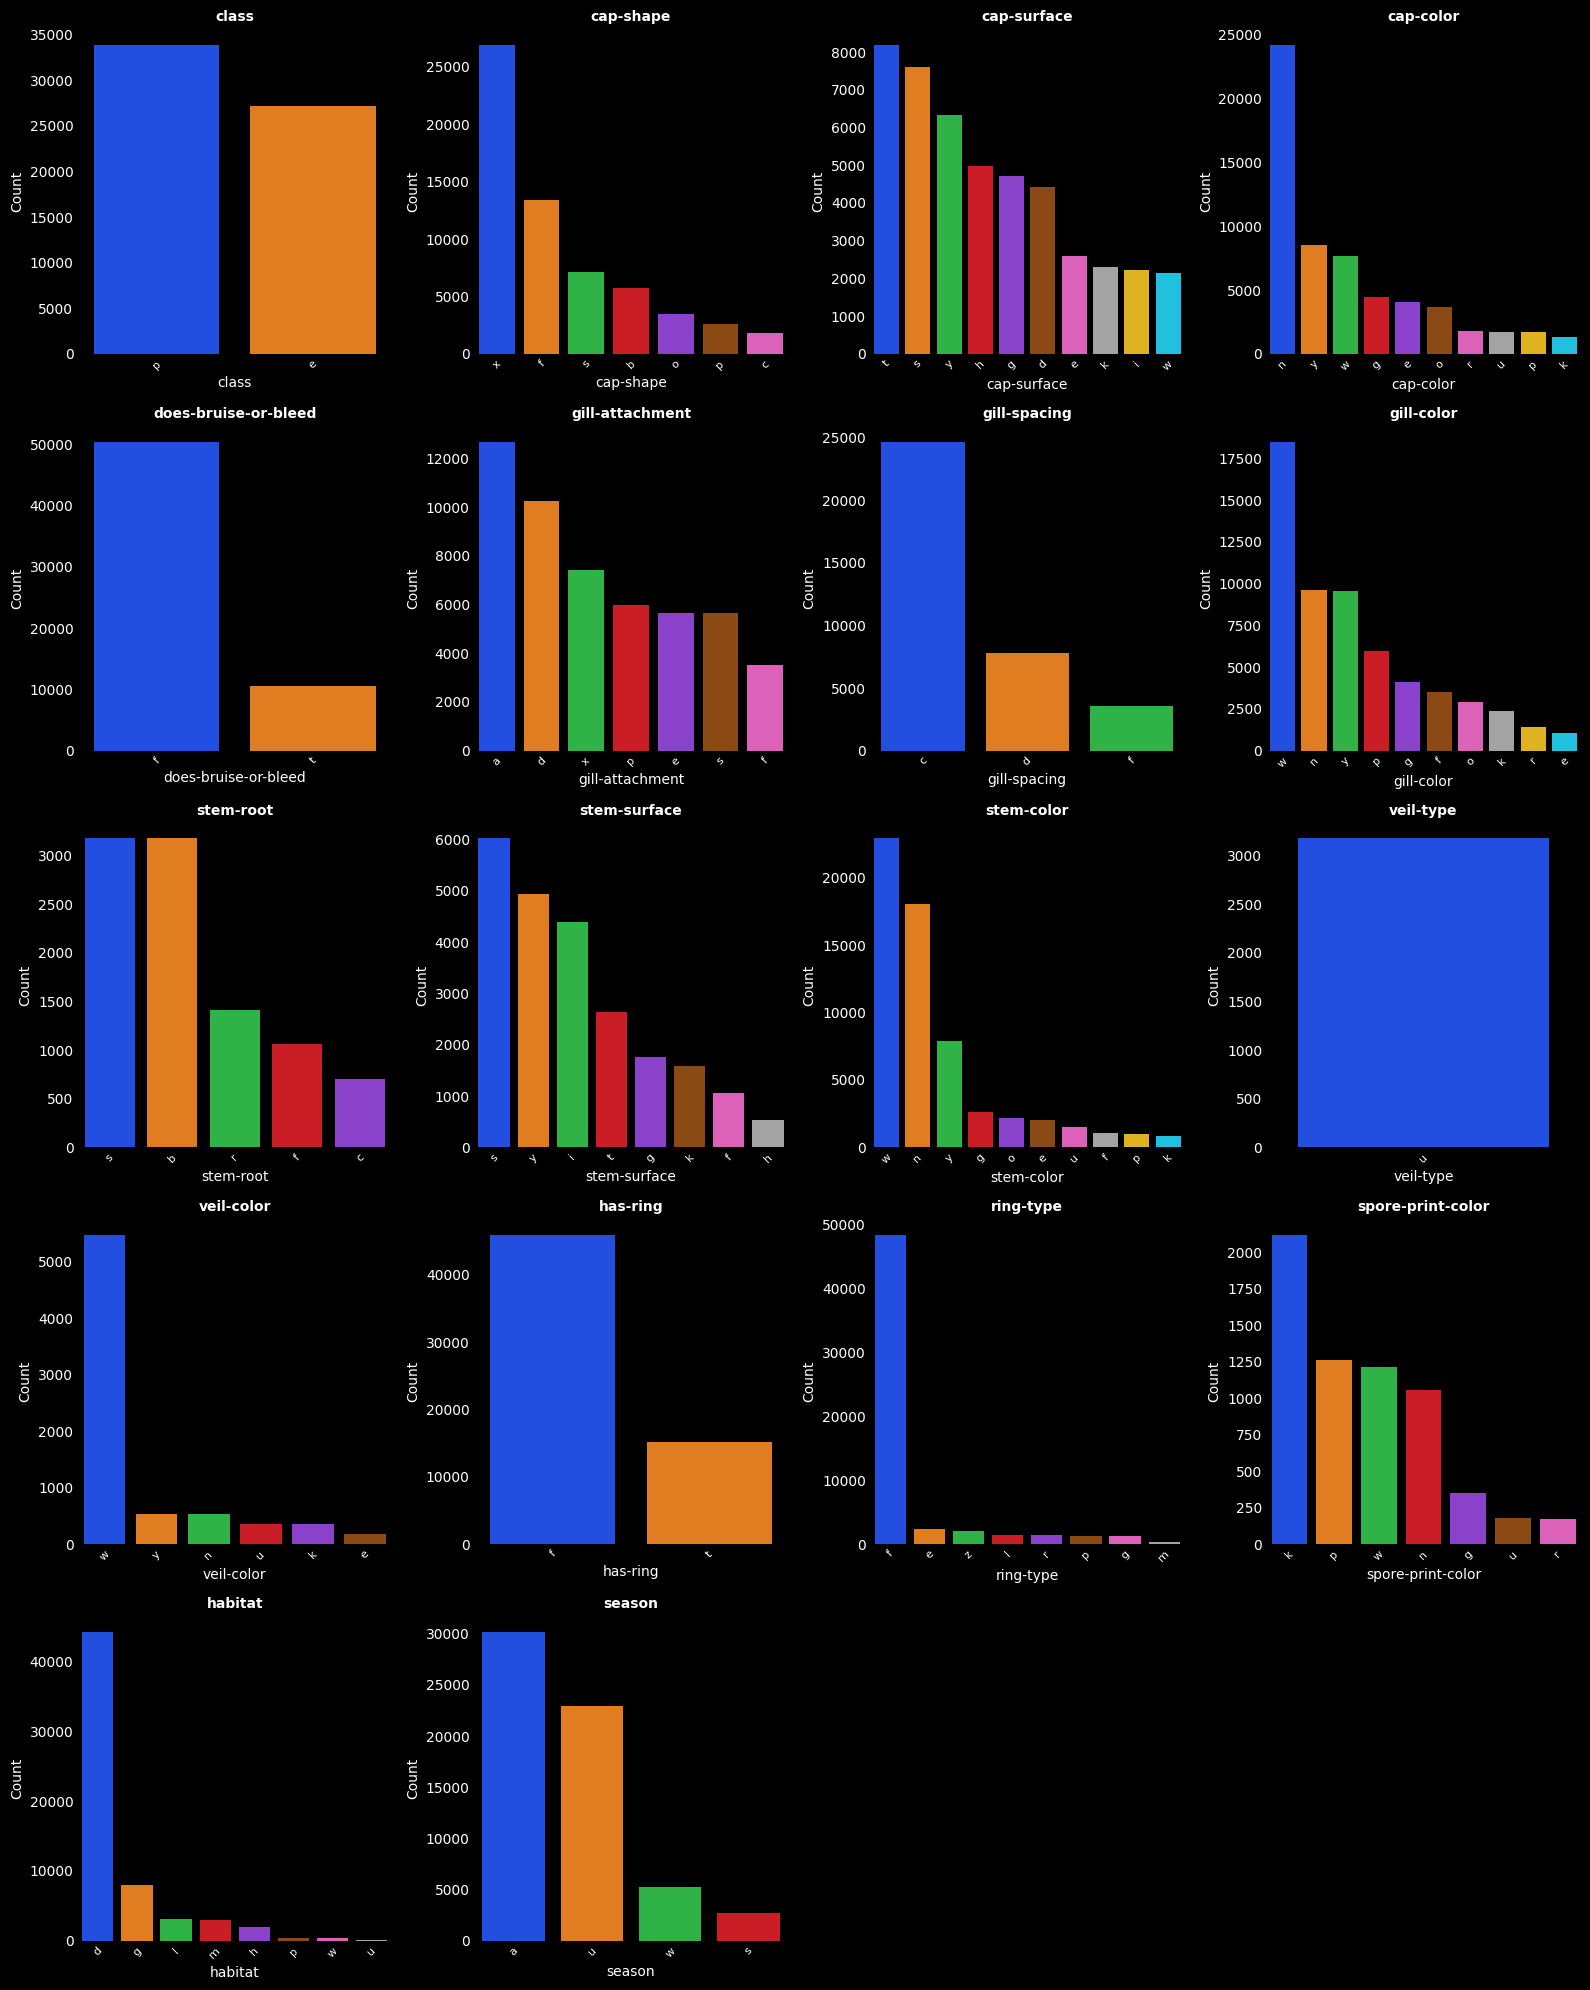

In [15]:
# Visualize distribution of categorical features using countplot
# Calculate grid size dynamically based on number of categorical columns
n_cols = len(categorical_cols)
n_rows = (n_cols + 3) // 4  # Ceiling division to get number of rows needed for 4 columns per row
fig, axes = plt.subplots(n_rows, 4, figsize=(16, 4 * n_rows))
axes = axes.ravel()

for idx, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, ax=axes[idx], order=df[col].value_counts().head(10).index, palette='bright')
    axes[idx].set_title(f'{col}', fontweight='bold', fontsize=10)
    axes[idx].set_ylabel('Count')
    axes[idx].tick_params(axis='x', rotation=45, labelsize=8)

# Hide empty subplots
for idx in range(n_cols, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

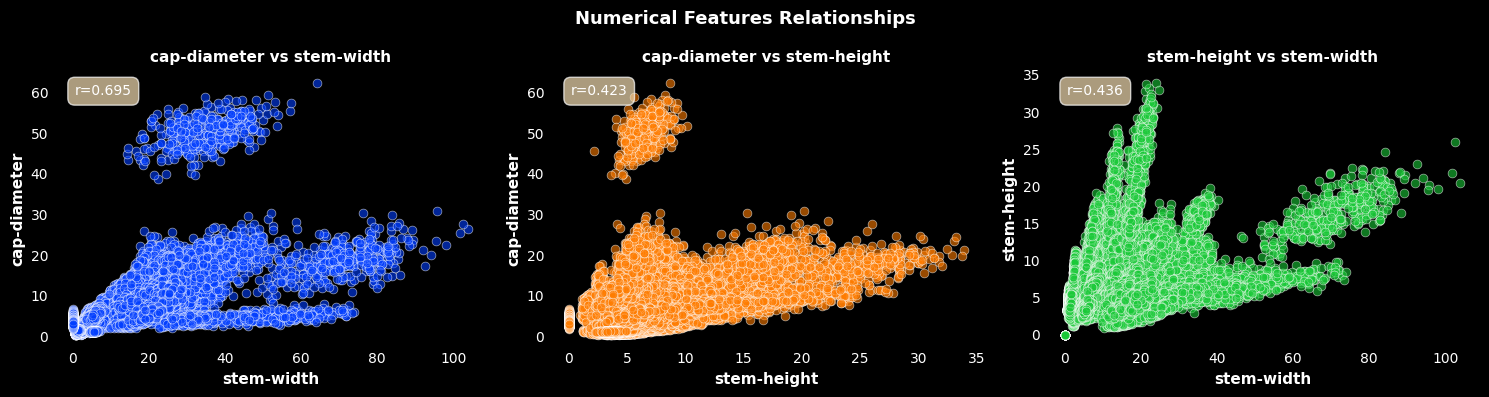

In [16]:
# Scatter plots for numerical features relationships
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Define the pairs to plot
pairs = [
    ('stem-width', 'cap-diameter'),
    ('stem-height', 'cap-diameter'),
    ('stem-width', 'stem-height')
]

for idx, (feat_x, feat_y) in enumerate(pairs):
    ax = axes[idx]
    cyberpunk_colors = sns.color_palette('bright', len(pairs))
    ax.scatter(df[feat_x], df[feat_y], alpha=0.6, s=40, color=cyberpunk_colors[idx], edgecolors='white', linewidth=0.5)
    ax.set_xlabel(feat_x, fontsize=11, fontweight='bold')
    ax.set_ylabel(feat_y, fontsize=11, fontweight='bold')
    ax.set_title(f'{feat_y} vs {feat_x}', fontsize=11, fontweight='bold')
    #ax.grid(True, alpha=0.3)
    
    # Add correlation coefficient
    corr = df[[feat_x, feat_y]].corr().iloc[0, 1]
    ax.text(0.05, 0.95, f'r={corr:.3f}', transform=ax.transAxes, 
           fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7, pad=0.5))

plt.suptitle('Numerical Features Relationships', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

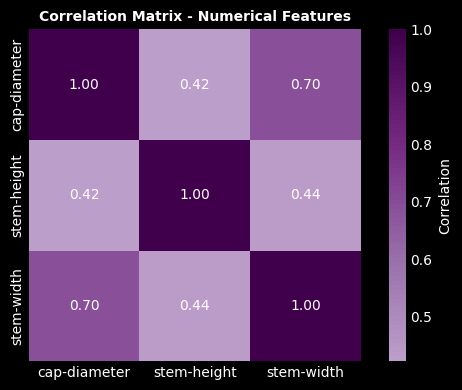

In [17]:
# Correlation heatmap
fig, ax = plt.subplots(figsize=(6, 4))
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='PRGn_r', center=0, 
            square=True, ax=ax, cbar_kws={'label': 'Correlation'})
ax.set_title('Correlation Matrix - Numerical Features', fontsize=10, fontweight='bold')
plt.tight_layout()
plt.show()

## 3. Data Cleaning

In [18]:
# Create a copy for cleaning
df_clean = df.copy()
print(f"Starting with {len(df_clean):,} rows and {df_clean.shape[1]} columns")

Starting with 61,069 rows and 21 columns


We'll remove duplicated records

In [19]:
# Remove duplicate rows
duplicates_before = len(df_clean)
df_clean = df_clean.drop_duplicates()
duplicates_removed = duplicates_before - len(df_clean)
print(f"Removed {duplicates_removed} duplicate rows | New shape: {df_clean.shape}")

Removed 146 duplicate rows | New shape: (60923, 21)


Also, during EDA, we've identified one feature that has only one value. Since it doesn't vary, it won't add any predictive power to our model. According to the dataset [docs](https://archive.ics.uci.edu/dataset/848/secondary+mushroom+dataset), "u" stands for universal, meaning all mushrooms share the same value, so we won't lose any information by removing it

In [20]:
df_clean['veil-type'].isnull().sum()

np.int64(57746)

In [21]:
df_clean['veil-type'].value_counts()

veil-type
u    3177
Name: count, dtype: int64

In [22]:
df_clean.drop('veil-type', axis=1, inplace=True)

Now let's deal with null values

In [23]:
# Check for missing values percentages
missing_data = df_clean.isnull().sum()
missing_percent = (df_clean.isnull().sum() / len(df_clean)) * 100
pd.DataFrame({'Missing Count': missing_data, 'Percentage': missing_percent})[missing_data > 0].sort_values(by='Percentage', ascending=False)

,Missing Count,Percentage
spore-print-color,54597,89.616401
veil-color,53510,87.832182
stem-root,51536,84.592026
stem-surface,38122,62.574069
gill-spacing,25062,41.137173
cap-surface,14120,23.176797
gill-attachment,9855,16.176157
ring-type,2471,4.055939


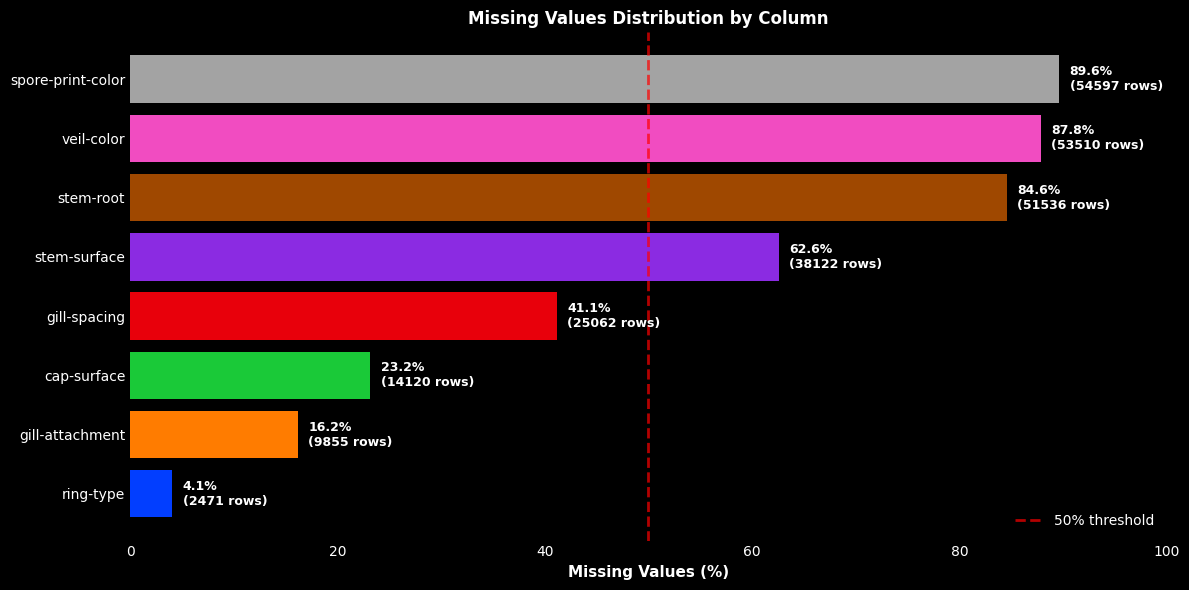

In [25]:
# Detailed missing values analysis by column with visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Calculate missing percentages for columns with nulls
missing_data = df_clean.isnull().sum()
missing_percent = (df_clean.isnull().sum() / len(df_clean)) * 100
missing_df = pd.DataFrame({
    'Column': missing_data[missing_data > 0].index,
    'Missing Count': missing_data[missing_data > 0].values,
    'Percentage': missing_percent[missing_data > 0].values
}).sort_values('Percentage', ascending=True)

# Create horizontal bar chart
colors = sns.color_palette('bright', len(missing_df))
bars = ax.barh(missing_df['Column'], missing_df['Percentage'], color=colors)

# Add percentage labels on bars
for i, (idx, row) in enumerate(missing_df.iterrows()):
    ax.text(row['Percentage'] + 1, i, f"{row['Percentage']:.1f}%\n({int(row['Missing Count'])} rows)", 
            va='center', fontsize=9, fontweight='bold')

ax.set_xlabel('Missing Values (%)', fontsize=11, fontweight='bold')
ax.set_title('Missing Values Distribution by Column', fontsize=12, fontweight='bold')
ax.set_xlim(0, 100)
ax.axvline(x=50, color='red', linestyle='--', linewidth=2, alpha=0.7, label='50% threshold')
ax.legend()
plt.tight_layout()
plt.show()



In [26]:
# Print summary statistics
print("\n📊 MISSING VALUES ANALYSIS")
print("=" * 70)
print(f"Total rows in cleaned data: {len(df_clean):,}")
print(f"\nColumns with missing values: {len(missing_df)}")
print(f"Columns without missing values: {len(df_clean.columns) - len(missing_df)}")
print("\n" + missing_df.to_string(index=False))
print("\n" + "=" * 70)
print("\n💡 STRATEGY CONSIDERATIONS:")
print("-" * 70)
for idx, row in missing_df.iterrows():
    if row['Percentage'] < 5:
        print(f"✓ {row['Column']:.<30} {row['Percentage']:>5.1f}% - KEEP & IMPUTE (minimal loss)")
    elif row['Percentage'] < 50:
        print(f"⚠ {row['Column']:.<30} {row['Percentage']:>5.1f}% - IMPUTE (still valuable info)")
    else:
        print(f"✗ {row['Column']:.<30} {row['Percentage']:>5.1f}% - CONSIDER REMOVING (mostly empty)")


📊 MISSING VALUES ANALYSIS
Total rows in cleaned data: 60,923

Columns with missing values: 8
Columns without missing values: 12

           Column  Missing Count  Percentage
        ring-type           2471    4.055939
  gill-attachment           9855   16.176157
      cap-surface          14120   23.176797
     gill-spacing          25062   41.137173
     stem-surface          38122   62.574069
        stem-root          51536   84.592026
       veil-color          53510   87.832182
spore-print-color          54597   89.616401


💡 STRATEGY CONSIDERATIONS:
----------------------------------------------------------------------
✓ ring-type.....................   4.1% - KEEP & IMPUTE (minimal loss)
⚠ gill-attachment...............  16.2% - IMPUTE (still valuable info)
⚠ cap-surface...................  23.2% - IMPUTE (still valuable info)
⚠ gill-spacing..................  41.1% - IMPUTE (still valuable info)
✗ stem-surface..................  62.6% - CONSIDER REMOVING (mostly empty)
✗ stem

In [ ]:
# Hybrid imputation strategy: Remove >80% nulls, mark rest as "Unknown"
print("\n" + "="*80)
print("HYBRID NULL HANDLING STRATEGY")
print("="*80 + "\n")

missing_data = df_clean.isnull().sum()
missing_percent = (df_clean.isnull().sum() / len(df_clean)) * 100

# Separate columns by null percentage
cols_to_drop = []
cols_to_impute = []

for col in df_clean.columns:
    if missing_percent[col] > 0:
        if missing_percent[col] > 80:
            cols_to_drop.append((col, missing_percent[col]))
        else:
            cols_to_impute.append((col, missing_percent[col]))

print("📊 COLUMNS TO DROP (>80% nulls):")
print("-" * 80)
if cols_to_drop:
    for col, pct in cols_to_drop:
        print(f"  ✗ {col:.<40} {pct:>5.1f}% null")
else:
    print("  (None - all columns have <80% nulls)")

print("\n📝 COLUMNS TO IMPUTE with 'Unknown' (<80% nulls):")
print("-" * 80)
if cols_to_impute:
    for col, pct in cols_to_impute:
        print(f"  ✓ {col:.<40} {pct:>5.1f}% null → will use 'Unknown'")
else:
    print("  (None - all columns are complete)")

# Apply strategy
print("\n" + "="*80)
print("APPLYING STRATEGY...")
print("="*80 + "\n")

# Step 1: Drop columns with >80% nulls
if cols_to_drop:
    print(f"Dropping {len(cols_to_drop)} column(s) with >80% nulls:")
    for col, pct in cols_to_drop:
        df_clean.drop(col, axis=1, inplace=True)
        print(f"  ✓ Dropped '{col}' ({pct:.1f}% null)")
else:
    print("No columns dropped (all have <80% nulls)")

# Step 2: Impute remaining nulls with "Unknown" (for categorical) or numerical strategy
print(f"\nImputing {len(cols_to_impute)} column(s) with 'Unknown':")
for col, pct in cols_to_impute:
    if df_clean[col].dtype == 'object':  # Categorical
        df_clean[col].fillna('Unknown', inplace=True)
        print(f"  ✓ Imputed '{col}' with 'Unknown' ({pct:.1f}% null)")
    else:  # Numerical - use median
        median_val = df_clean[col].median()
        df_clean[col].fillna(median_val, inplace=True)
        print(f"  ✓ Imputed '{col}' with median={median_val:.2f} ({pct:.1f}% null)")

# Verify no nulls remain
remaining_nulls = df_clean.isnull().sum().sum()
print("\n" + "="*80)
print(f"✅ VERIFICATION: {remaining_nulls} null values remain in dataset")
print(f"Final dataset shape: {df_clean.shape}")
print("="*80 + "\n")

In [27]:
df_clean['spore-print-color'].unique()

array([nan, 'w', 'p', 'k', 'r', 'u', 'n', 'g'], dtype=object)

In [28]:
df_clean['spore-print-color'].value_counts()

spore-print-color
k    2118
p    1259
w    1212
n    1031
g     353
u     182
r     171
Name: count, dtype: int64

In [29]:
df_clean['spore-print-color'].isnull().sum()

np.int64(54597)

In [30]:
# Detailed imputation analysis for columns with missing values
print("\n" + "="*80)
print("DETAILED IMPUTATION STRATEGY ANALYSIS")
print("="*80 + "\n")

# Get columns with nulls
cols_with_nulls = df_clean.columns[df_clean.isnull().any()].tolist()

for col in cols_with_nulls:
    null_count = df_clean[col].isnull().sum()
    null_pct = (null_count / len(df_clean)) * 100
    
    print(f"\n{'─'*80}")
    print(f"Column: {col}")
    print(f"{'─'*80}")
    print(f"  Missing: {null_count} rows ({null_pct:.2f}%)")
    print(f"  Data type: {df_clean[col].dtype}")
    
    # Get non-null values info
    non_null_vals = df_clean[col].dropna()
    
    if df_clean[col].dtype == 'object':  # Categorical
        print(f"  Unique values: {non_null_vals.nunique()}")
        print(f"  Top 5 values:")
        for val, count in non_null_vals.value_counts().head(5).items():
            print(f"    - {val}: {count} ({count/len(non_null_vals)*100:.1f}%)")
        print(f"  ✅ IMPUTATION: Mode (most frequent category)")
        
    else:  # Numerical
        print(f"  Statistics of non-null values:")
        print(f"    - Mean: {non_null_vals.mean():.2f}")
        print(f"    - Median: {non_null_vals.median():.2f}")
        print(f"    - Std: {non_null_vals.std():.2f}")
        print(f"    - Min: {non_null_vals.min():.2f}")
        print(f"    - Max: {non_null_vals.max():.2f}")
        print(f"  ✅ IMPUTATION: Median (robust to outliers)")
    
    # Check correlation with target (if missing is predictive)
    df_clean['has_missing_' + col] = df_clean[col].isnull().astype(int)
    if df_clean['has_missing_' + col].sum() > 0:  # Only if there are nulls
        corr_with_target = df_clean.groupby('has_missing_' + col)['class'].apply(
            lambda x: (x == x.mode()[0]).sum() / len(x) if len(x.mode()) > 0 else 0
        )
        print(f"  📊 Target distribution by missing status:")
        print(f"    - When {col} is present: {corr_with_target.iloc[0]*100:.1f}% edible")
        print(f"    - When {col} is missing: {corr_with_target.iloc[1]*100:.1f}% edible")
        if abs(corr_with_target.iloc[0] - corr_with_target.iloc[1]) > 10:
            print(f"    ⚠️  INSIGHT: Missing values have different target distribution!")
    
    df_clean.drop('has_missing_' + col, axis=1, inplace=True)

print("\n" + "="*80)
print("SUMMARY: All columns will be IMPUTED (none discarded)")
print("="*80 + "\n")


DETAILED IMPUTATION STRATEGY ANALYSIS


────────────────────────────────────────────────────────────────────────────────
Column: cap-surface
────────────────────────────────────────────────────────────────────────────────
  Missing: 14120 rows (23.18%)
  Data type: object
  Unique values: 11
  Top 5 values:
    - t: 8184 (17.5%)
    - s: 7580 (16.2%)
    - y: 6341 (13.5%)
    - h: 4974 (10.6%)
    - g: 4722 (10.1%)
  ✅ IMPUTATION: Mode (most frequent category)
  📊 Target distribution by missing status:
    - When cap-surface is present: 56.3% edible
    - When cap-surface is missing: 52.5% edible

────────────────────────────────────────────────────────────────────────────────
Column: gill-attachment
────────────────────────────────────────────────────────────────────────────────
  Missing: 9855 rows (16.18%)
  Data type: object
  Unique values: 7
  Top 5 values:
    - a: 12697 (24.9%)
    - d: 10247 (20.1%)
    - x: 7413 (14.5%)
    - p: 6001 (11.8%)
    - e: 5648 (11.1%)
  ✅ IMPUTAT

## 4. Model Training & Evaluation

In [ ]:
# Verify target variable distribution after cleaning
class_dist = pd.DataFrame({
    'Class': df_clean['class'].value_counts().index,
    'Count': df_clean['class'].value_counts().values,
    'Percentage': (df_clean['class'].value_counts(normalize=True) * 100).values
})
class_dist

In [ ]:
# Cleaning summary
summary_data = {
    'Original rows': len(df),
    'Cleaned rows': len(df_clean),
    'Rows removed': len(df) - len(df_clean),
    'Data retained (%)': f"{(len(df_clean) / len(df)) * 100:.2f}%",
    'Total features': df_clean.shape[1]
}

for key, value in summary_data.items():
    print(f"{key:.<30} {value}")

In [ ]:
# Add descriptive statistics of cleaned data
df_clean.describe()